In [3]:
import numpy as np
import keras

Using TensorFlow backend.


In [63]:
n = 10
D = [[],[]]
T = []
for i in np.arange(10)*0.1:
    for j in np.arange(10)*0.1:
        D[0].append(i)
        D[1].append(j)
        T.append(i*j+i*i-j*j)
        
D = np.array(D).T
T = np.array(T)

In [99]:
??Adam

In [165]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
model = Sequential([
    Dense(5, input_shape=(2,)),
    Activation('sigmoid'),
    Dense(1),
    Activation('linear'),
])
model.compile(optimizer=Adam(lr=0.0001), loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 5)                 15        
_________________________________________________________________
activation_105 (Activation)  (None, 5)                 0         
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 6         
_________________________________________________________________
activation_106 (Activation)  (None, 1)                 0         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [166]:
from keras.callbacks import LearningRateScheduler
def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    return LearningRateScheduler(schedule, verbose=1)

lr_sched = step_decay_schedule(initial_lr=1e-1, decay_factor=0.95, step_size=1)

history = model.fit(D, T, callbacks=[lr_sched], epochs=50)

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.1.
100/100 [==============================] - 2s 18ms/step - loss: 0.2280
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.095.
100/100 [==============================] - 0s 107us/step - loss: 0.1302
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.09025.
100/100 [==============================] - 0s 105us/step - loss: 0.1253
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0857375.
100/100 [==============================] - 0s 99us/step - loss: 0.0916
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.081450625.
100/100 [==============================] - 0s 102us/step - loss: 0.0808
Epoch 6/50

Epoch 00006: LearningRateScheduler setting learning rate to 0.07737809374999999.
100/100 [==============================] - 0s 100us/step - loss: 0.0502
Epoch 7/50

Epoch 00007: LearningRateScheduler setting learning rate to 

100/100 [==============================] - 0s 80us/step - loss: 0.0183


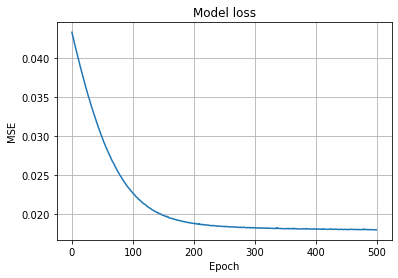

In [124]:
plot_history(history)

In [91]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.grid()
    plt.show()

    
    
#     # Plot training & validation accuracy values
#     plt.plot(history.history['acc'])
#     plt.plot(history.history['val_acc'])
#     plt.title('Model accuracy')
#     plt.ylabel('Accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Test'], loc='upper left')
#     plt.show()

#     # Plot training & validation loss values
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('Model loss')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Test'], loc='upper left')
#     plt.show()

In [59]:
model.evaluate(D.T, T)

100/100 [==============================] - 0s 1ms/step


0.02239025816321373